In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/formula-1-drivers-dataset/F1DriversDataset.csv


### This is a Simple Visualization of using Formula 1 drivers data.

## Import Data

In [2]:
df = pd.read_csv('/kaggle/input/formula-1-drivers-dataset/F1DriversDataset.csv')
df.head()

,Driver,Nationality,Seasons,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,...,Championship Years,Decade,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active,Champion
0,Carlo Abate,Italy,"[1962, 1963]",0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,NaN,1960,0.0,0.000000,0.0,0.0,0.0,0.000000,2,False
1,George Abecassis,United Kingdom,"[1951, 1952]",0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,1950,0.0,1.000000,0.0,0.0,0.0,0.000000,2,False
2,Kenny Acheson,United Kingdom,"[1983, 1985]",0.0,10.0,3.0,0.0,0.0,0.0,0.0,...,NaN,1980,0.0,0.300000,0.0,0.0,0.0,0.000000,2,False
3,Andrea de Adamich,Italy,"[1968, 1970, 1971, 1972, 1973]",0.0,36.0,30.0,0.0,0.0,0.0,0.0,...,NaN,1970,0.0,0.833333,0.0,0.0,0.0,0.166667,5,False
4,Philippe Adams,Belgium,[1994],0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,1990,0.0,1.000000,0.0,0.0,0.0,0.000000,1,False


In [3]:
len(df)

868

### Check and Replace null values

In [4]:
df.isnull().sum()

Driver                  0
Nationality             0
Seasons                 0
Championships           0
Race_Entries            0
Race_Starts             0
Pole_Positions          0
Race_Wins               0
Podiums                 0
Fastest_Laps            0
Points                  0
Active                  0
Championship Years    834
Decade                  0
Pole_Rate               0
Start_Rate              0
Win_Rate                0
Podium_Rate             0
FastLap_Rate            0
Points_Per_Entry        0
Years_Active            0
Champion                0
dtype: int64

In [5]:
df = df.fillna(0)

## Exploratory Data Analysis

### TOP 20 Nationalities by Driver counts  

In [6]:
driver_count = df.groupby('Nationality')['Driver'].count()


In [7]:
df_driver_count = pd.DataFrame(driver_count)
df_driver_count = df_driver_count.sort_values(by='Driver', ascending=False).reset_index()

In [8]:
df_driver_count

,Nationality,Driver
0,United Kingdom,164
1,United States,160
2,Italy,99
3,France,72
4,West Germany,39
5,Brazil,32
6,Argentina,25
7,Switzerland,24
8,Belgium,23
9,South Africa,23


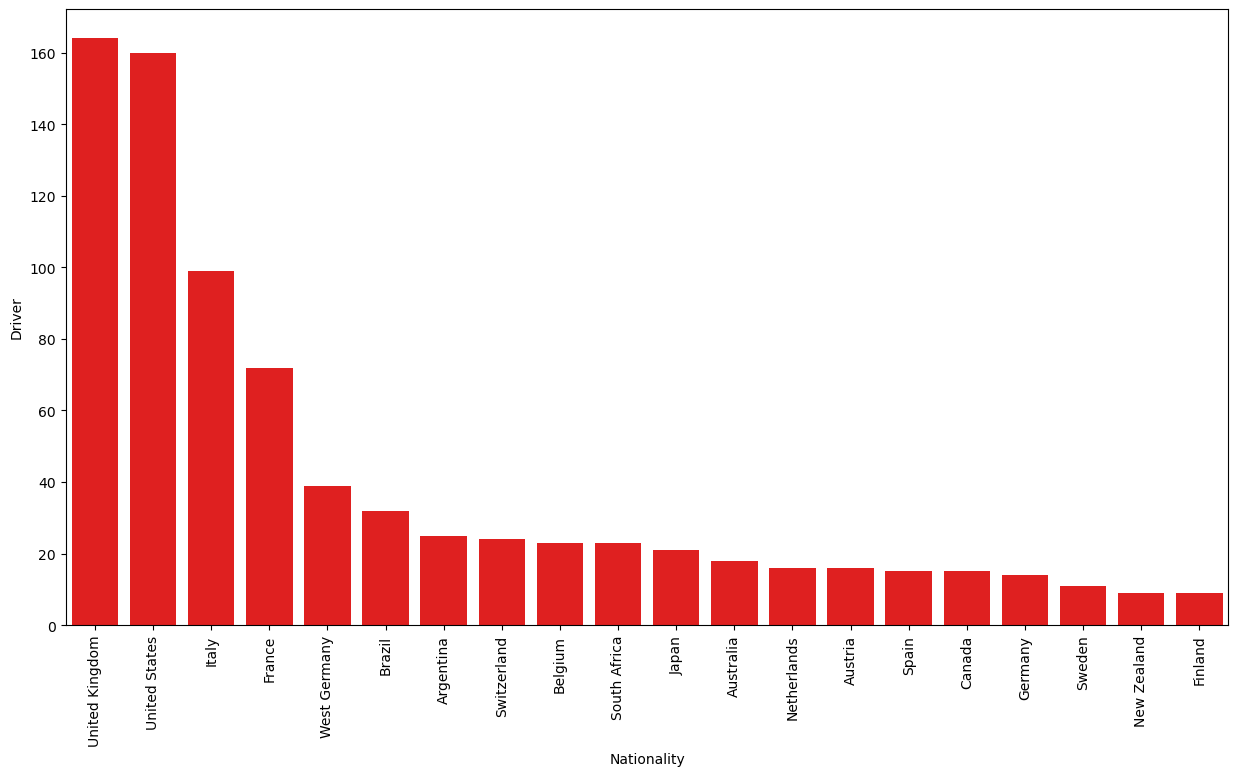

In [9]:
plt.figure(figsize = (15,8))
sns.barplot(x = 'Nationality', y = 'Driver',data = df_driver_count.head(20), color='red')
plt.xticks(rotation=90)
plt.show()

### Championships by Nationality

In [10]:
driver_champ = df.groupby('Nationality')['Championships'].sum()


df_driver_champ = pd.DataFrame(driver_champ)
df_driver_champ = df_driver_champ.sort_values(by='Championships', ascending=False).reset_index()
df_driver_champ['Championships'] = df_driver_champ['Championships'].astype('int64')
df_driver_champ.head(10)

,Nationality,Championships
0,United Kingdom,20
1,Germany,12
2,Brazil,8
3,Argentina,5
4,Austria,4
5,Australia,4
6,France,4
7,Finland,4
8,Italy,3
9,Spain,2


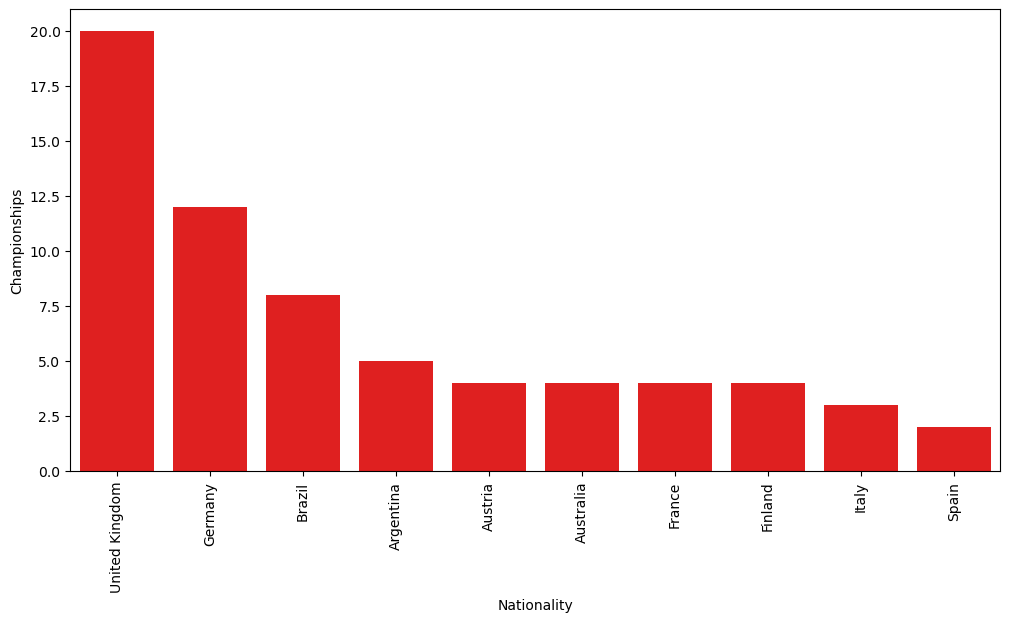

In [11]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Nationality', y = 'Championships',data = df_driver_champ.head(10), color='red')
plt.xticks(rotation=90)
plt.show()

### Top 10 Race Starters

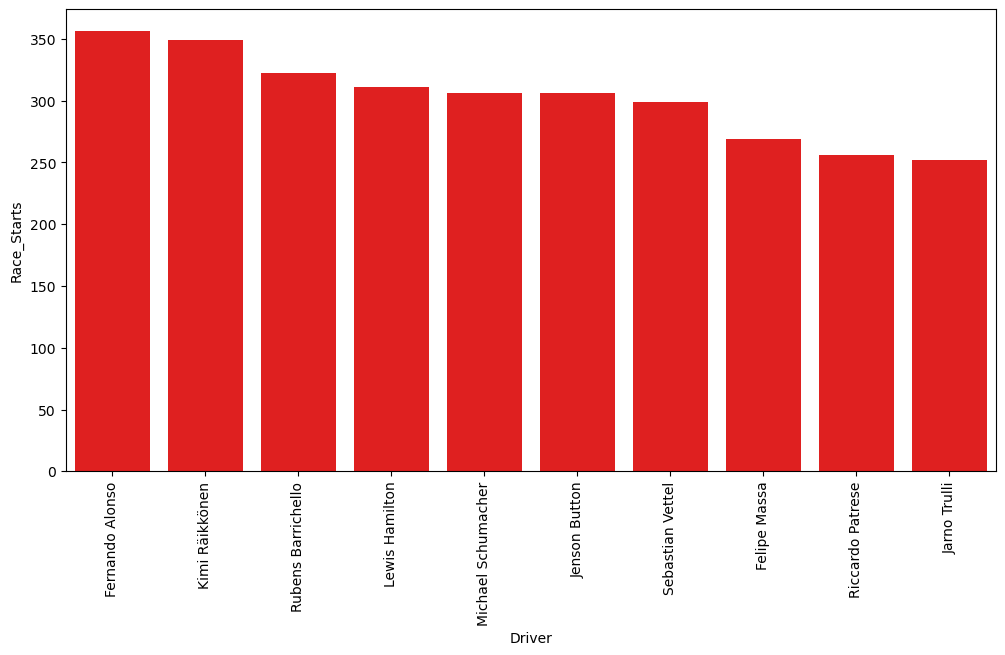

In [12]:
df_race_starters = pd.DataFrame(df.groupby('Driver')['Race_Starts'].sum().sort_values(ascending=False)).reset_index()

plt.figure(figsize = (12,6))
sns.barplot(x = 'Driver', y = 'Race_Starts',data = df_race_starters.head(10), color='red')

plt.xticks(rotation=90)
plt.show()

### Most Pole Positions

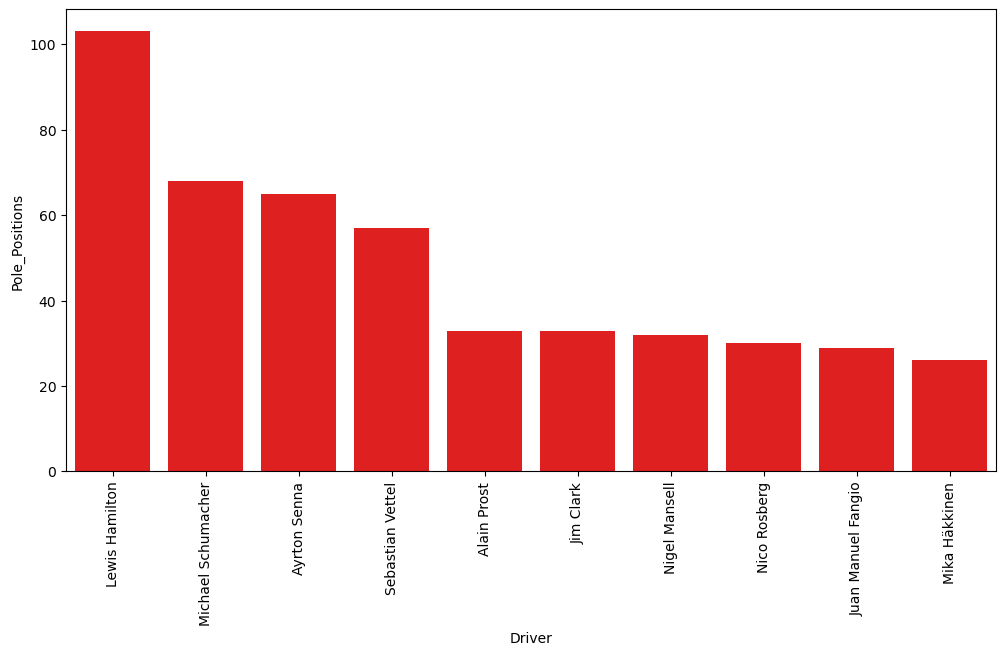

In [13]:
df_race_starters = pd.DataFrame(df.groupby('Driver')['Pole_Positions'].sum().sort_values(ascending=False)).reset_index()

plt.figure(figsize = (12,6))
sns.barplot(x = 'Driver', y = 'Pole_Positions',data = df_race_starters.head(10),  color='red')

plt.xticks(rotation=90)
plt.show()




### Most wins

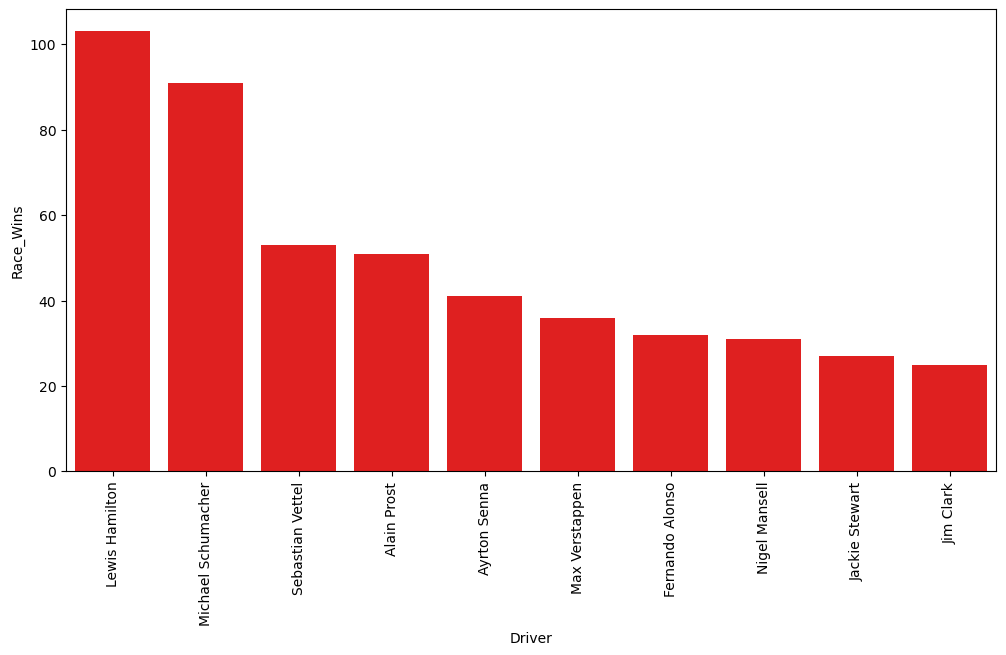

In [14]:
df_race_starters = pd.DataFrame(df.groupby('Driver')['Race_Wins'].sum().sort_values(ascending=False)).reset_index()

plt.figure(figsize = (12,6))
sns.barplot(x = 'Driver', y = 'Race_Wins',data = df_race_starters.head(10),  color='red')

plt.xticks(rotation=90)
plt.show()


### WIns and Podiumns Combined

<AxesSubplot:xlabel='Driver'>

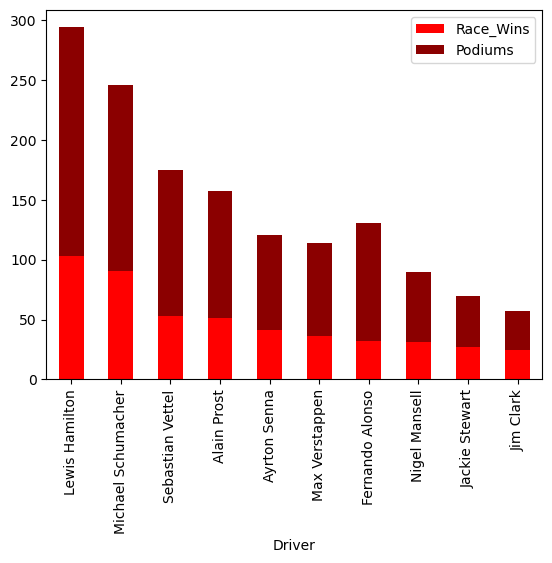

In [15]:
df_wins_podiums = df[['Driver', 'Race_Wins', 'Podiums']].sort_values(by='Race_Wins', ascending=False).set_index('Driver')

df_wins_podiums.head(10)

df_wins_podiums.head(10).plot(kind='bar', stacked=True, color=['red', 'darkred'])